In [2]:
import cifar10
from matplotlib import pyplot as plt

In [3]:
cifar10.data_path = "data/CIFAR-10/"

In [4]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [5]:
classnames = cifar10.load_class_names()
classnames

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

#### cls = class_numbers , labels = class_labels

In [6]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_train.shape, cls_train.shape, labels_train.shape

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


((50000, 32, 32, 3), (50000,), (50000, 10))

In [7]:
labels_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [8]:
images_train[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

In [9]:
cls_train[:5]

array([6, 9, 9, 4, 1])

In [10]:
images_test, cls_test, labels_test = cifar10.load_test_data()
images_test.shape, cls_test.shape, labels_test.shape

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


((10000, 32, 32, 3), (10000,), (10000, 10))

In [ ]:
from sklearn.decomposition import PCA

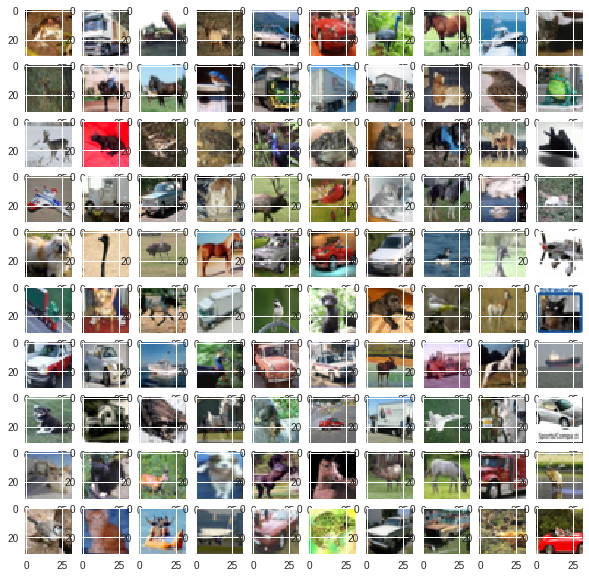

In [71]:
fig = plt.figure(figsize=(10,10))
for i in range(100):
  ax = fig.add_subplot(10,10,i+1)
  ax.imshow(images_train[i],cmap = plt.cm.bone)
plt.show()

In [72]:
images_train = images_train.reshape(50000,3072)
images_train.shape

(50000, 3072)

In [73]:
pca = PCA()
pca.fit(images_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

checking for the best n_compnents for the PCA

In [75]:
k = 0
total = sum(pca.explained_variance_)
cur_var = 0

while cur_var/total < 0.96 :
  cur_var += pca.explained_variance_[k]
  k+=1
k

265

In [76]:
print("Images train shape : ",images_train.shape)
pca = PCA(n_components=k,whiten=True)
images_train_tranform = pca.fit_transform(images_train)
images_train.shape

Images train shape :  (50000, 3072)


(50000, 3072)

In [77]:
images_train_tranform.shape

(50000, 265)

In [ ]:
from sklearn.svm import SVC

In [78]:
sv_clf = SVC()
sv_clf.fit(images_train_tranform,cls_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [79]:
images_test.shape

images_test = images_test.reshape(10000,3072)

images_test.shape

(10000, 3072)

In [80]:
images_test_transform = pca.transform(images_test)
images_test.shape,images_test_transform.shape

((10000, 3072), (10000, 265))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf_clf = RandomForestClassifier()
rf_clf.fit(images_train_tranform,cls_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
import numpy as np
classnames
ypred = sv_clf.predict(x_test_transform)
yp =[]
for i in ypred:
    yp.append(classnames[i])
np.savetxt("predictions.csv",yp,fmt='%s')